In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
prev_ari = pd.read_csv("./michaels_results/prev_results_ari.tab.txt", sep="\t")
prev_nmi = pd.read_csv("./michaels_results/prev_results_nmi.tab.txt", sep="\t")
prev_ari["scDMAE_avg"] = prev_ari["scMAE"].astype(float)
prev_nmi["scDMAE_avg"] = prev_nmi["scMAE"].astype(float)
prev_ari["scDMAE_best"] = prev_ari["scMAE"].astype(float)
prev_nmi["scDMAE_best"] = prev_nmi["scMAE"].astype(float)
prev_ari

,datasets,CLEAR,scGNN,contrastive-sc,scVI,graph-sc,scVI-LD,scNAME,scMAE,scDMAE_avg,scDMAE_best
0,Pollen,0.151,0.705,0.831,0.952,0.911,0.875,0.924,0.936,0.936,0.936
1,Lung,0.102,0.387,0.600,0.423,0.743,0.522,0.643,0.749,0.749,0.749
2,Limb_Muscle,0.809,0.583,0.989,0.942,0.978,0.986,0.982,0.983,0.983,0.983
3,worm_neuron,0.188,0.061,0.155,0.481,0.477,0.511,0.251,0.487,0.487,0.487
4,Melanoma,0.240,0.467,0.519,0.527,0.654,0.503,0.639,0.750,0.750,0.750
5,Young,0.452,0.237,0.603,0.715,0.664,0.470,0.629,0.770,0.770,0.770
6,Guo,0.638,0.424,0.812,0.603,0.736,0.733,0.814,0.839,0.839,0.839
7,Baron,0.466,0.384,0.495,0.541,0.643,0.526,0.657,0.771,0.771,0.771
8,Wang,0.400,0.235,0.937,0.927,-0.039,0.742,0.943,0.936,0.936,0.936
9,Spleen,0.414,0.379,0.906,0.323,0.905,0.508,0.918,0.928,0.928,0.928


In [3]:
# Datasets used in scMAE
dataset_mappings = {
    "Quake_Smart-seq2_Lung": "Lung",
    "worm_neuron_cell": "worm_neuron",
    "Melanoma_5K": "Melanoma",
    "Quake_10x_Spleen": "Spleen",
    "Pollen": "Pollen",
    "Limb_Muscle": "Limb_Muscle",
    "Young": "Young",
    "Guo": "Guo",
    "Baron": "Baron",
    "Wang": "Wang",
    "Tosches": "Tosches",
    "Bach": "Bach",
    "Shekhar": "Shekhar",
    "Macosko": "Macosko",
    "hrvatin": "Hrvatin"
}

In [4]:
for dir in os.listdir("./michaels_results"):
    name = dataset_mappings.get(dir, "Unknown Dataset")
    if name == "Unknown Dataset":
        continue
    all_results = pd.read_csv(f"./michaels_results/{dir}/all_iterations_results.csv")
    average_metrics = pd.read_csv(f"./michaels_results/{dir}/average_metrics.csv")
    prev_ari.loc[prev_ari["datasets"] == name, "scDMAE_avg"] = np.max(average_metrics["avg_ari"].values)
    prev_nmi.loc[prev_nmi["datasets"] == name, "scDMAE_avg"] = np.max(average_metrics["avg_nmi"].values)
    prev_ari.loc[prev_ari["datasets"] == name, "scDMAE_best"] = np.max(all_results["ari"].values)
    prev_nmi.loc[prev_nmi["datasets"] == name, "scDMAE_best"] = np.max(all_results["nmi"].values)

prev_ari.loc[prev_ari["datasets"] == "Average", "scDMAE_avg"] = np.mean(prev_ari["scDMAE_avg"].values[:-1])
prev_nmi.loc[prev_nmi["datasets"] == "Average", "scDMAE_avg"] = np.mean(prev_nmi["scDMAE_avg"].values[:-1])
prev_ari.loc[prev_ari["datasets"] == "Average", "scDMAE_best"] = np.mean(prev_ari["scDMAE_best"].values[:-1])
prev_nmi.loc[prev_nmi["datasets"] == "Average", "scDMAE_best"] = np.mean(prev_nmi["scDMAE_best"].values[:-1])

In [5]:
prev_nmi

,datasets,CLEAR,scGNN,contrastive-sc,scVI,graph-sc,scVI-LD,scNAME,scMAE,scDMAE_avg,scDMAE_best
0,Pollen,0.306,0.808,0.947,0.916,0.894,0.922,0.923,0.930,0.827216,0.876743
1,Lung,0.286,0.642,0.705,0.726,0.765,0.820,0.796,0.824,0.818567,0.867473
2,Limb_Muscle,0.854,0.734,0.926,0.970,0.976,0.955,0.962,0.974,0.959645,0.992956
3,worm_neuron,0.325,0.211,0.635,0.673,0.308,0.697,0.456,0.684,0.529433,0.565967
4,Melanoma,0.385,0.606,0.631,0.615,0.618,0.731,0.713,0.745,0.703311,0.731310
5,Young,0.576,0.375,0.777,0.649,0.730,0.778,0.771,0.824,0.740136,0.757738
6,Guo,0.795,0.628,0.796,0.827,0.839,0.818,0.838,0.859,0.848766,0.860635
7,Baron,0.723,0.572,0.777,0.768,0.674,0.807,0.809,0.819,0.739879,0.770465
8,Wang,0.405,0.438,0.862,0.663,0.867,0.020,0.878,0.864,0.780789,0.889567
9,Spleen,0.534,0.501,0.557,0.638,0.802,0.843,0.846,0.861,0.769363,0.838934


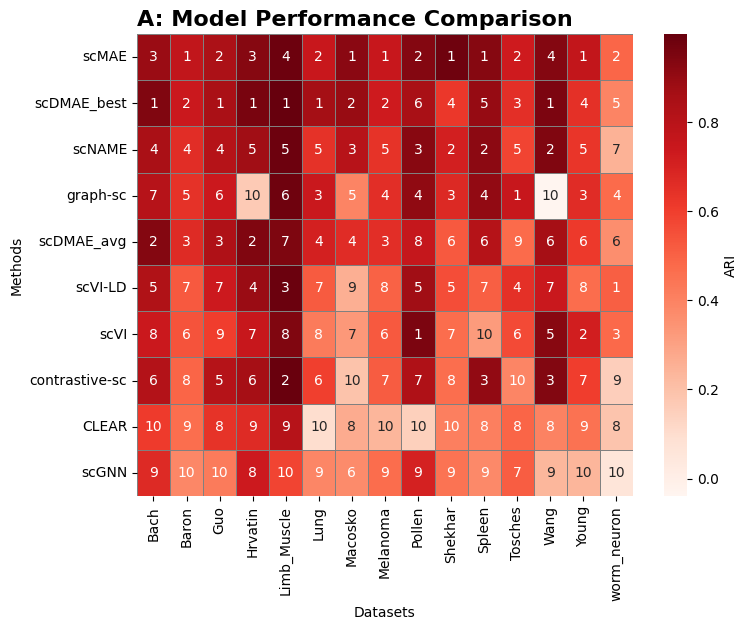

CLEAR             0.421000
scGNN             0.440000
contrastive-sc    0.638000
scVI              0.619000
graph-sc          0.631000
scVI-LD           0.637000
scNAME            0.748000
scMAE             0.840000
scDMAE_avg        0.717168
scDMAE_best       0.799306
Name: 15, dtype: float64
CLEAR                0.589
scGNN                0.571
contrastive-sc       0.762
scVI                 0.757
graph-sc             0.742
scVI-LD              0.728
scNAME               0.807
scMAE                0.853
scDMAE_avg        0.786089
scDMAE_best       0.823763
Name: 15, dtype: object


/tmp/ipykernel_41287/3659302351.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.values, y=average_scores.index, palette="rocket", ax=ax)
/tmp/ipykernel_41287/3659302351.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.values, y=average_scores.index, palette="rocket", ax=ax)


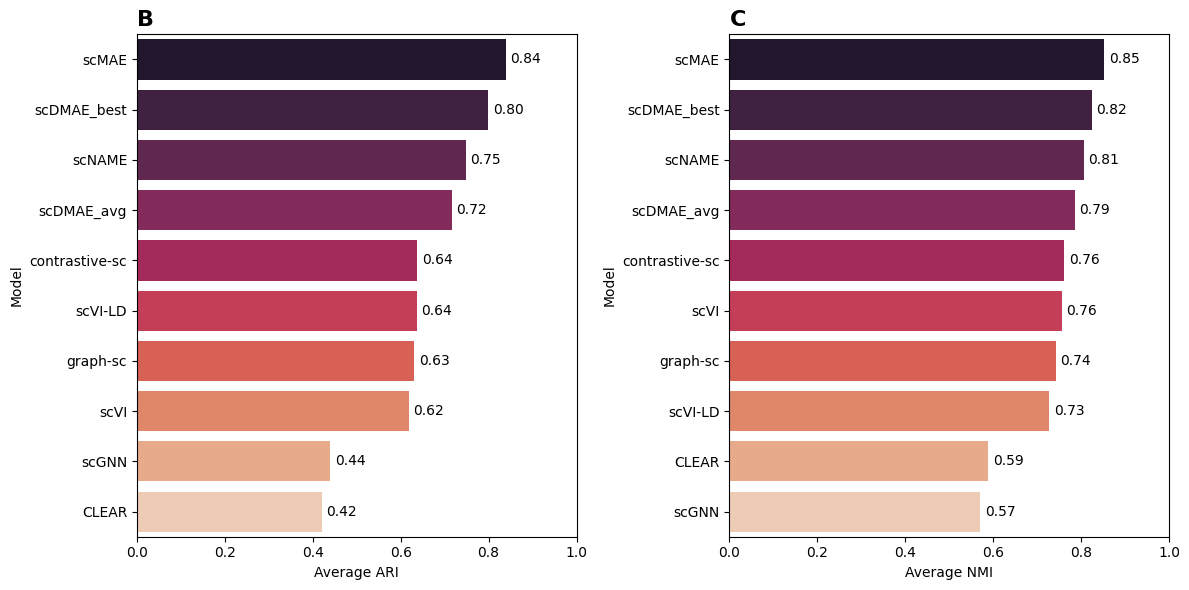

In [19]:
# ARI and NMI performance visualization
dataset_names = prev_ari["datasets"]
ari_scores = prev_ari.drop(columns="datasets")
ari_scores_no_avg = ari_scores.iloc[:-1]
ranks = ari_scores_no_avg.rank(axis=1, method="min", ascending=False).astype(int)
ari_melted = ari_scores_no_avg.reset_index().melt(id_vars="index", var_name="model", value_name="ARI")
ranks_melted = ranks.reset_index().melt(id_vars="index", var_name="model", value_name="Rank")
merged = ari_melted.merge(ranks_melted, on=["index", "model"])
merged["dataset"] = dataset_names.iloc[merged["index"]].values

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Panel A
pivot_ari = merged.pivot(index="model", columns="dataset", values="ARI")
pivot_rank = merged.pivot(index="model", columns="dataset", values="Rank")

average_rank = pivot_rank.mean(axis=1)
methods_sorted = average_rank.sort_values().index.tolist()

pivot_ari = pivot_ari.loc[methods_sorted]
pivot_rank = pivot_rank.loc[methods_sorted]

sns.heatmap(
    pivot_ari,
    annot=pivot_rank,
    fmt=".0f",   # show rank as integer
    cmap="Reds",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "ARI"},
    ax=ax
)
ax.set_title("A: Model Performance Comparison", loc="left", fontsize=16, fontweight="bold")
ax.set_xlabel("Datasets")
ax.set_ylabel("Methods")

plt.savefig("./michaels_results/ARI_Performance_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Panel B
ax = axes[0]
average_scores = ari_scores.iloc[-1]
print(average_scores)

average_scores = average_scores.sort_values(ascending=False)
sns.barplot(x=average_scores.values, y=average_scores.index, palette="rocket", ax=ax)

# Annotate bars with exact values
for i, (val, name) in enumerate(zip(average_scores.values, average_scores.index)):
    ax.text(val + 0.01, i, f"{val:.2f}", va="center")

ax.set_xlim(0, 1)
ax.set_ylabel("Model")
ax.set_xlabel("Average ARI")
ax.set_title("B", loc="left", fontsize=16, fontweight="bold")

# Panel C
ax = axes[1]

# Use the "Average" row for barplot
average_scores = prev_nmi.iloc[-1][1:]
print(average_scores)
average_scores = average_scores.sort_values(ascending=False)
sns.barplot(x=average_scores.values, y=average_scores.index, palette="rocket", ax=ax)
# Annotate bars with exact values
for i, (val, name) in enumerate(zip(average_scores.values, average_scores.index)):
    ax.text(val + 0.01, i, f"{val:.2f}", va="center")
ax.set_xlim(0, 1)
ax.set_ylabel("Model")
ax.set_xlabel("Average NMI")
ax.set_title("C", loc="left", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.savefig("./michaels_results/AVG_ARI_NMI_Performance_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()
